In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv(r"C:\Users\Zana\Desktop\portfolio_projects\3. Marketing Campaign Regression Analysis\cleaned_marketing.csv")
print(df.head())

   id      c_date    campaign_name    category  campaign_id  impressions  \
0   1  2021-02-01   facebook_tier1      social       349043       148263   
1   2  2021-02-01   facebOOK_tier2      social       348934       220688   
2   3  2021-02-01       google_hot      search     89459845        22850   
3   4  2021-02-01      google_wide      search       127823       147038   
4   5  2021-02-01  youtube_blogger  influencer        10934       225800   

   mark_spent  clicks  leads  orders  revenue  
0     7307.37    1210     13       1   4981.0  
1    16300.20    1640     48       3  14962.0  
2     5221.60     457      9       1   7981.0  
3     6037.00    1196     24       1   2114.0  
4    29962.20    2258     49      10  84490.0  


# 4. Visualizing the Impact of Marketing Variables and Model Performance

## Introduction
To better understand the effectiveness of the regression models and the relationships between marketing variables and revenue, three key visualizations have been generated. These visualizations provide insights into the performance of the model and the impact of various marketing efforts on revenue prediction.

### 1. **Accuracy of Predicted vs Actual Revenue**
This plot compares the model's predicted revenue values to the actual revenue values. The closer the points are to the line of perfect prediction, the more accurate the model is. This visualization helps assess the overall accuracy of the model by highlighting how well it predicts revenue based on marketing spend and other factors.

### 2. **Residual Analysis: Model Error Distribution**
The residuals plot shows the difference between the actual and predicted revenue values (residuals). This plot is essential for identifying whether the model has any systematic errors or bias. Ideally, the residuals should be randomly scattered around zero, indicating that the model captures the relationship between the variables well without missing any key patterns.

### 3. **Impact of Marketing Variables on Revenue Prediction**
This set of scatter plots illustrates the relationship between various marketing variables (e.g., `mark_spent`, `impressions`, `clicks`, and `leads`) and revenue. These plots help in understanding which marketing factors have the most significant influence on revenue. By visualizing each variable's impact, it becomes easier to identify which variables are most strongly correlated with revenue, aiding in optimizing marketing strategies.


### Accuracy of Predicted vs Actual Revenue

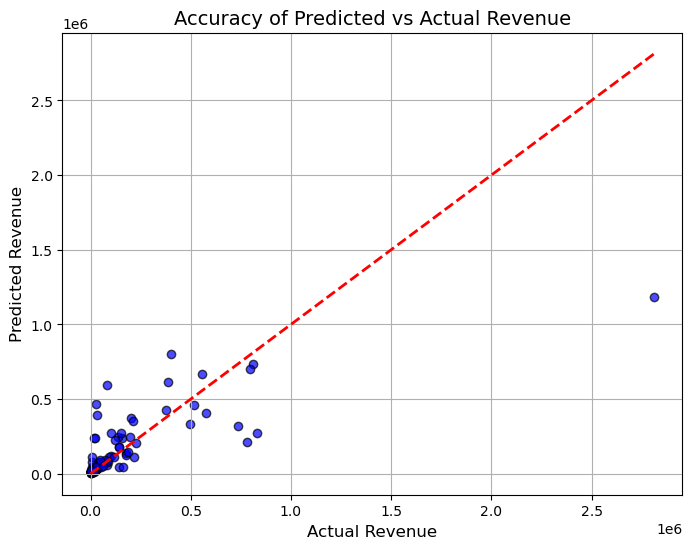

In [6]:
import matplotlib.pyplot as plt

# Include relevant predictors
X = df[['mark_spent']]  # For simple linear regression, or include other variables for multiple
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot Actual vs Predicted Revenue
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

# Add labels and title
plt.title('Accuracy of Predicted vs Actual Revenue', fontsize=14)
plt.xlabel('Actual Revenue', fontsize=12)
plt.ylabel('Predicted Revenue', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

### Residual Analysis: Model Error Distribution

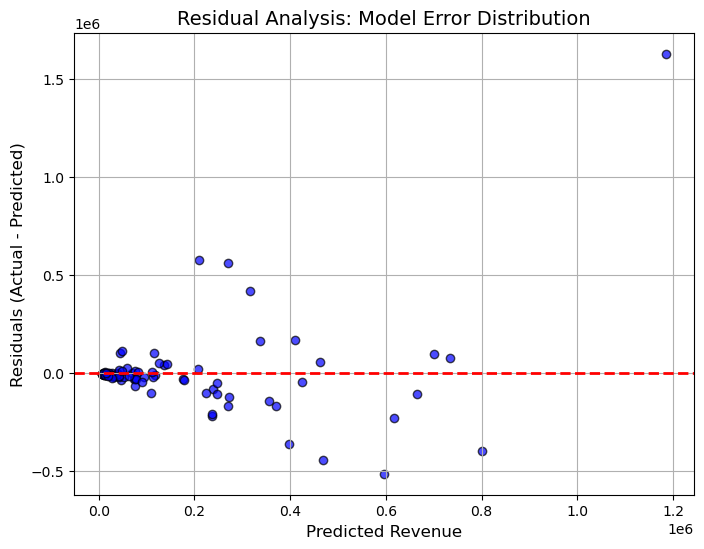

In [7]:
import matplotlib.pyplot as plt

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot the residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', lw=2)

# Add labels and title
plt.title('Residual Analysis: Model Error Distribution', fontsize=14)
plt.xlabel('Predicted Revenue', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()


### Impact of Marketing Variables on Revenue Prediction

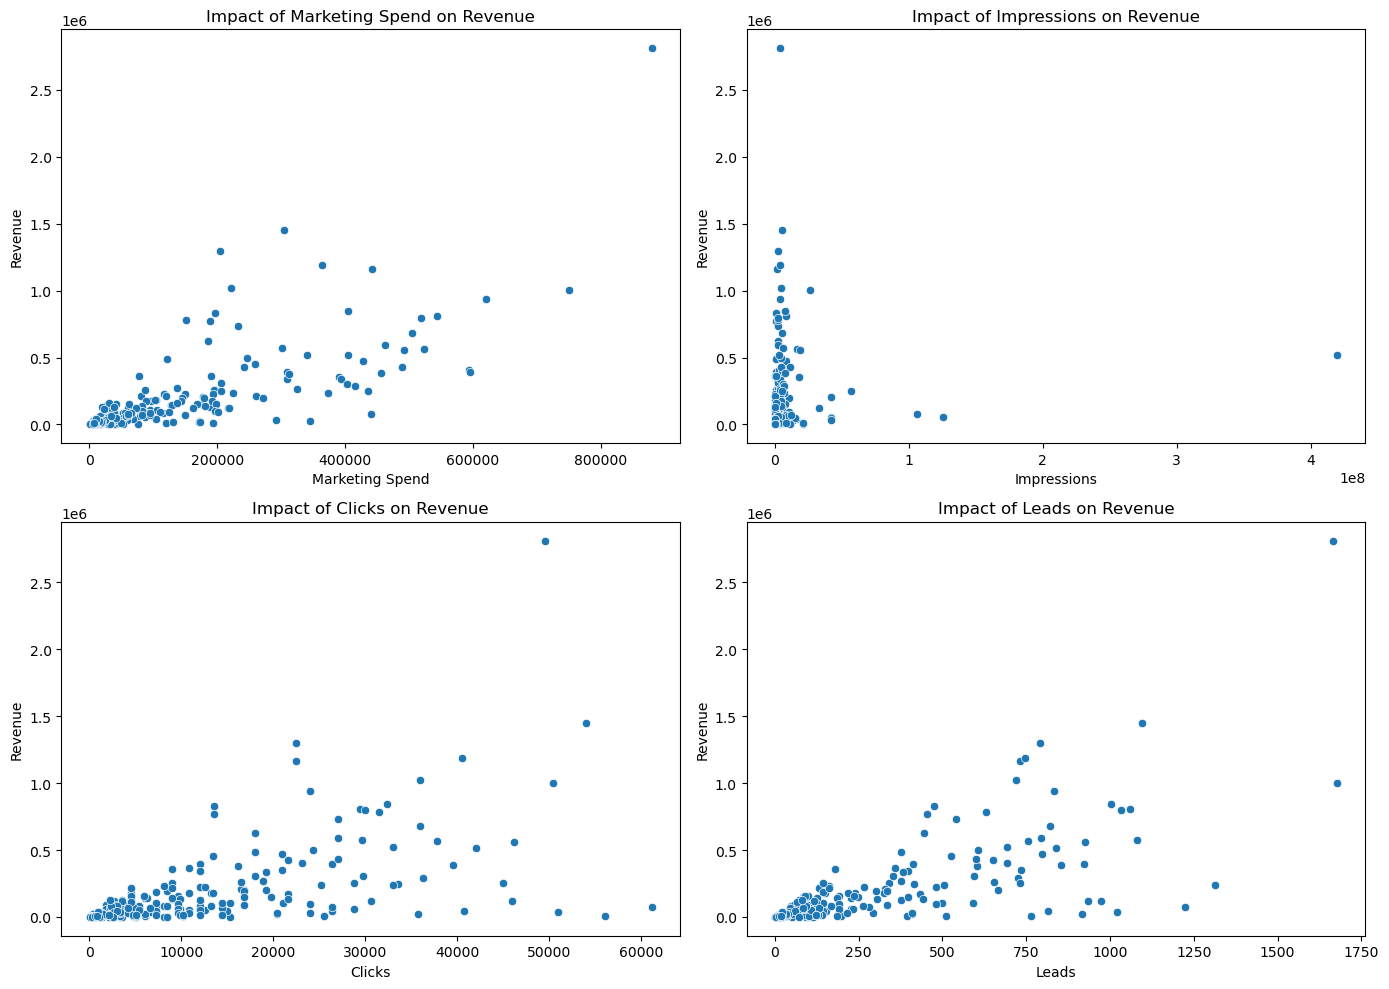

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots to visualize the relationship between each marketing variable and revenue
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for mark_spent vs revenue
sns.scatterplot(x=df['mark_spent'], y=df['revenue'], ax=axes[0, 0])
axes[0, 0].set_title('Impact of Marketing Spend on Revenue')
axes[0, 0].set_xlabel('Marketing Spend')
axes[0, 0].set_ylabel('Revenue')

# Scatter plot for impressions vs revenue
sns.scatterplot(x=df['impressions'], y=df['revenue'], ax=axes[0, 1])
axes[0, 1].set_title('Impact of Impressions on Revenue')
axes[0, 1].set_xlabel('Impressions')
axes[0, 1].set_ylabel('Revenue')

# Scatter plot for clicks vs revenue
sns.scatterplot(x=df['clicks'], y=df['revenue'], ax=axes[1, 0])
axes[1, 0].set_title('Impact of Clicks on Revenue')
axes[1, 0].set_xlabel('Clicks')
axes[1, 0].set_ylabel('Revenue')

# Scatter plot for leads vs revenue
sns.scatterplot(x=df['leads'], y=df['revenue'], ax=axes[1, 1])
axes[1, 1].set_title('Impact of Leads on Revenue')
axes[1, 1].set_xlabel('Leads')
axes[1, 1].set_ylabel('Revenue')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Correlation matrix for numerical features

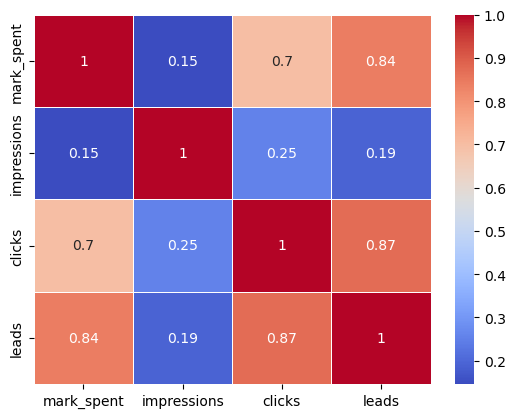

In [9]:
import seaborn as sns
correlation_matrix = df[['mark_spent', 'impressions', 'clicks', 'leads']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Insights from Correlation Matrix of Marketing Variables

The correlation matrix visualizes the relationships between four key marketing variables: **Marketing Spend (mark_spent)**, **Impressions**, **Clicks**, and **Leads**. Here are the key insights from the heatmap:

1. **Marketing Spend vs Other Variables**:
   - **Impressions**: A weak positive correlation (0.15) between marketing spend and impressions suggests that the amount spent on campaigns has a minimal impact on the number of impressions generated.
   - **Clicks**: A moderate positive correlation (0.7) indicates that higher marketing spend tends to result in more clicks. However, the correlation is not perfect, suggesting other factors affect the number of clicks.
   - **Leads**: A strong positive correlation (0.84) between marketing spend and leads suggests that more money spent on marketing campaigns significantly increases the number of leads generated.

2. **Impressions vs Other Variables**:
   - **Clicks**: There is a moderate positive correlation (0.25) between impressions and clicks, implying that campaigns with more impressions tend to generate more clicks, but the relationship is not very strong.
   - **Leads**: A weak positive correlation (0.19) between impressions and leads indicates that while impressions play a role, they are not the primary driver of lead generation.

3. **Clicks vs Leads**:
   - **Clicks** and **Leads** exhibit a strong positive correlation (0.87), suggesting that campaigns with more clicks tend to generate more leads. This is a crucial relationship for optimizing digital campaigns, as higher engagement through clicks often leads to higher conversion rates.

### Conclusion:
Marketing spend is strongly correlated with both leads and clicks, with the highest correlation to leads. To optimize marketing effectiveness, campaigns should focus on increasing both spend and click engagement, as these are the strongest predictors of lead generation. The correlation between impressions and other variables is weaker, indicating that impressions alone do not directly lead to higher revenue or more leads.


#### Polynomial regression when the data show non-linear relationships between features.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred_poly = polyreg.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred_poly)}')


R-squared: 0.4847909184595288


### Regularization to improve the model and prevent overfitting.

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred_ridge)}')

R-squared: 0.5761201463929706


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred_rf)}')


R-squared: 0.2984677626056076


### Assessing the influence of variables

In [16]:
importances = rf.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance}')


mark_spent: 1.0


### Insights from Regression Models and Feature Importance

In this section, various regression models were applied to the data to predict revenue. The goal was to evaluate the performance of these models and understand the influence of marketing variables on the outcome.

#### 1. Polynomial Regression
- **R-squared: 0.4847**: The polynomial regression model explained about 48.47% of the variance in the data. This is a moderate fit, which suggests that there may be non-linear relationships between the features and the target variable (revenue). 
- **Insight**: While polynomial regression captures some non-linear relationships, its R-squared value indicates that a significant portion of the variance is still unexplained, suggesting room for model improvement.

#### 2. Regularization with Ridge Regression
- **R-squared: 0.5761**: The ridge regression model, which applies regularization to prevent overfitting, explains 57.61% of the variance in the data. The model's performance is better than polynomial regression, suggesting that regularization helps improve the fit by preventing model complexity from growing too large.
- **Insight**: The regularization improves model performance, making it more generalizable and reducing overfitting. This is an important technique when working with data that may have multicollinearity or a high number of features.

#### 3. Random Forest Regression
- **R-squared: 0.2984**: The random forest model performed less well with an R-squared value of 29.84%. This suggests that, while random forests are powerful models capable of capturing complex relationships, they did not perform well in this case, possibly due to the nature of the data or a need for hyperparameter tuning.
- **Insight**: Although random forests can handle complex data, they may not always perform better than simpler models, especially if the data does not have strong non-linear relationships or the model parameters are not optimized.

#### 4. Assessing the Influence of Variables
- **Feature Importance**: The feature importance results indicate that **Marketing Spend (mark_spent)** is the most important variable for predicting revenue. It has an importance score of **1.0**, meaning it has the greatest impact on the model's predictions.
- **Insight**: Since marketing spend is the most important variable, focusing on optimizing the marketing budget and spend allocation may have the largest effect on improving revenue. The other features, such as impressions, clicks, and leads, likely have a smaller impact, which suggests that future models should focus on understanding and optimizing marketing spend.

### Conclusion
- Polynomial and ridge regression both perform better than random forest regression in this scenario, suggesting that non-linear relationships and regularization can enhance model accuracy.
- Marketing spend is the most influential variable in predicting revenue, highlighting its importance in designing marketing strategies.


# Conclusion of Results

## 1. **Accuracy of Predicted vs Actual Revenue**
- The scatter plot demonstrates that most of the predicted revenue values are reasonably close to the actual values, but there are a few large outliers. The points close to the red diagonal line indicate accurate predictions, whereas the points farther from the line represent larger errors.
- **Conclusion**: The model performs reasonably well, but the presence of outliers suggests there may be some factors not fully captured by the model or that additional improvements can be made to enhance accuracy.

## 2. **Residual Analysis: Model Error Distribution**
- The residuals plot shows that most of the errors (residuals) are clustered near zero, which is a positive sign. However, there are a few significant residuals, particularly at higher predicted values. The spread of residuals increases as the predicted revenue increases, indicating that the model may struggle with predicting higher revenue amounts accurately.
- **Conclusion**: The residuals are mostly random, indicating the model fits well. However, the model has some difficulty with larger revenue predictions, as seen from the increasing spread of errors.

## 3. **Impact of Marketing Variables on Revenue Prediction**
- The scatter plots indicate the relationship between each marketing variable (`mark_spent`, `impressions`, `clicks`, and `leads`) and revenue.
  - **Marketing Spend**: There is a positive correlation between marketing spend and revenue, with higher marketing spend generally leading to higher revenue.
  - **Impressions**: The relationship between impressions and revenue is less clear, with most points clustered near lower impression values. This suggests that impressions alone may not be a strong predictor of revenue.
  - **Clicks**: There is a noticeable positive correlation between clicks and revenue, indicating that campaigns generating more clicks are likely to generate higher revenue.
  - **Leads**: The number of leads also shows a positive correlation with revenue, suggesting that higher lead generation is associated with higher revenue.
  
- **Conclusion**: The variables `mark_spent`, `clicks`, and `leads` have a more significant impact on revenue than impressions. Future models may benefit from focusing on optimizing spend, generating more clicks, and improving lead conversion strategies.

## Overall Conclusion:
The analysis reveals that while the model performs adequately, there are areas for improvement, particularly with higher revenue predictions. Variables like marketing spend, clicks, and leads have the most substantial impact on revenue, suggesting these are critical factors to focus on in marketing strategies. However, the presence of outliers and some variability in residuals indicates the model could be fine-tuned further for better accuracy, especially for larger revenue values.
